<a href="https://colab.research.google.com/github/artisticdrake/Fmml-Assignments/blob/main/FMML_Module4_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron
### Module Coordinator: Jashn Arora

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

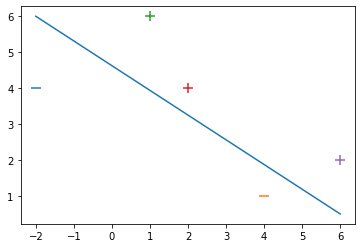

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

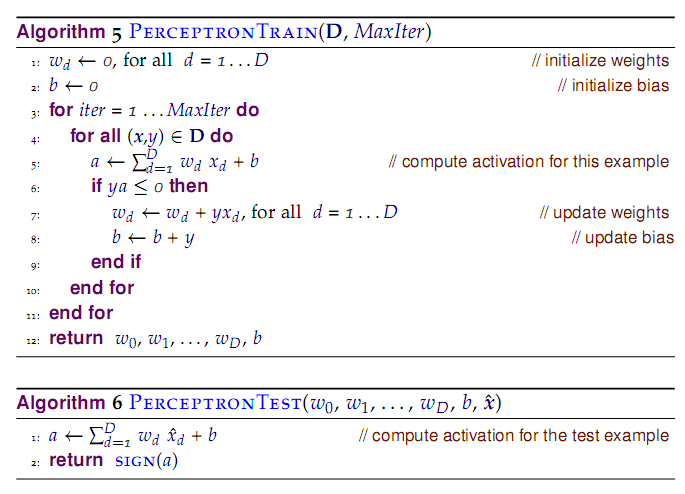

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

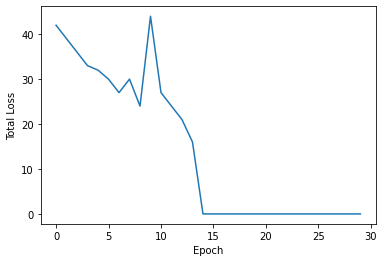

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

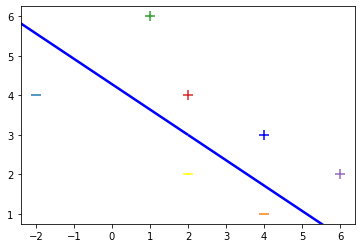

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


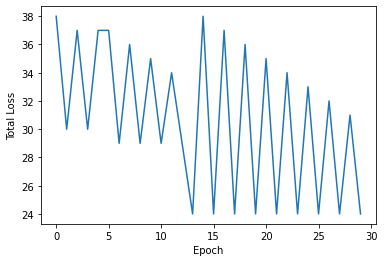

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

##**Observations**

***3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.***



> ***From the given toy dataset, we can say that, if the data is not linearly separable, the algorithm will not be able to find a perfect boundary and will instead converge to a boundary that has the most number of correct classifications.***



#**Perceptron Algorithm on Sonar Dataset**

***1.Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.***

In [14]:
import pandas as pd

In [45]:
from google.colab import files
uploaded = files.upload()

Saving sonar.all-data(1).csv to sonar.all-data(1).csv


In [46]:
df = pd.read_csv('sonar.all-data(1).csv')

In [47]:
df

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [48]:
k=np.linspace(-1, -1, len(df))
l=np.linspace(1,1,len(df))
k

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [49]:
import random as rd
nl=[]
m=[k,l]
for i in range(len(df)):
  j=rd.randrange(0,2)
  nl.append(m[j][i])

In [50]:
df['']=pd.Series(k)
df.values

array([[ 0.0453,  0.0523,  0.0843, ...,  0.0052,  0.0044, -1.    ],
       [ 0.0262,  0.0582,  0.1099, ...,  0.0095,  0.0078, -1.    ],
       [ 0.01  ,  0.0171,  0.0623, ...,  0.004 ,  0.0117, -1.    ],
       ...,
       [ 0.0522,  0.0437,  0.018 , ...,  0.0077,  0.0031, -1.    ],
       [ 0.0303,  0.0353,  0.049 , ...,  0.0036,  0.0048, -1.    ],
       [ 0.026 ,  0.0363,  0.0136, ...,  0.0061,  0.0115, -1.    ]])

In [111]:
X=df.values
y=np.array(nl)

In [112]:
perceptron_algo(X, y)

array([ 0.6614,  4.5901,  2.2998,  5.2442,  5.9466,  4.689 ,  3.193 ,
        0.7995, -4.5195, -3.3301,  5.0287,  8.6493,  7.0465,  0.3181,
        3.6246, -1.8549, -3.5139,  3.6028,  4.5707, -3.355 , -9.3355,
       -0.6519,  1.9513, -1.3799,  4.0104,  0.8433,  1.3614,  1.5986,
       -3.2647,  1.0332,  4.5146,  1.4883, -3.3453,  3.7309, -0.3561,
       -2.6954,  3.6315, -3.3527,  1.826 ,  6.2525, -3.4377,  1.203 ,
       -0.5074, -6.7986, -5.7319, -5.7525, -4.1962, -4.9614, -2.6774,
       -0.5953, -0.8635,  0.1891, -0.2263,  0.2686,  0.2633,  0.2522,
       -0.2981,  0.3085,  0.0253,  0.3073, -3.    ])

array([  0.4982,   9.7723,   2.7659,  10.4452,  11.4411,   5.9787,
         7.2104,   1.1442, -10.5134,  -4.8444,   8.8646,  11.3339,
         7.8148,  -3.8036,   6.9195,  -5.7215,  -6.2652,   5.4597,
         5.897 ,  -5.649 , -10.4113,   1.8754,   2.5698,  -6.0693,
         5.537 ,  -3.2515,   2.7323,   3.9782, -11.2711,   2.2924,
         2.8431,   3.2761,  -5.1169,   8.9467,  -2.6414, -10.0867,
         8.7097,  -6.0811,   3.9541,  10.8468,  -8.4374,   4.8542,
        -1.511 ,  -7.4603,  -5.0487,  -7.0421,  -4.9561,  -9.182 ,
        -4.4189,  -0.7423,  -1.2115,   0.4032,  -0.6459,   1.8034,
         1.1711,   0.8269,  -0.5621,   0.5883,   0.1089,   0.9374,
        -6.    ])

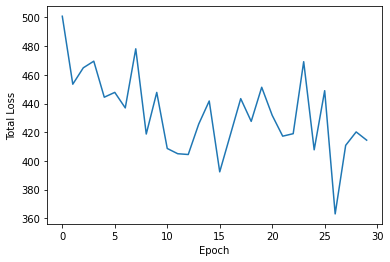

In [113]:
perceptron_algo_plot(X, y)

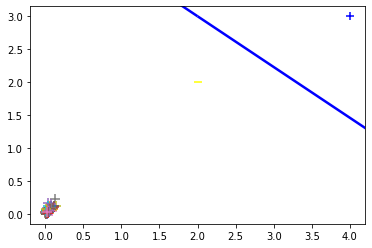

In [107]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=50, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=50, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=5, color='blue')

##**Observations**

***Here we can observe the implementation of Perceptron Algorithm on Sonar Dataset.***

#**Tuning Epoch**

***2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?***


In [126]:
def perceptron_algo1(X, Y):
    w1 = np.zeros(len(X[0]))
    eta = 1
    epochs = 50

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w1) * Y[i]) <= 0:
                w1 = w1 + eta * X[i] * Y[i]
    return w1

In [127]:
def perceptron_algo_plot1(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w1 = np.zeros(len(X[0]))
    eta = 1
    n = 60
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w1) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w1) * Y[i])
                w1 = w1 + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w1

In [128]:
perceptron_algo1(X, y)

array([  0.0223,  14.4138,   2.4119,  12.2372,  15.5917,   4.7872,
         8.6838,  -0.8257, -14.2076,  -5.9631,  10.819 ,  10.395 ,
         9.8982,  -4.2372,   9.4343,  -4.7737,  -6.8932,   4.8221,
         2.4581,  -7.2367,  -8.0937,   3.5123,   2.999 , -10.4931,
         7.4384,  -4.3148,   4.3359,   7.0712, -13.8246,   4.7095,
         2.291 ,   5.315 ,  -9.1605,  11.2601,  -0.5457, -12.8422,
        12.5581,  -7.5086,   3.2449,  12.5151, -11.268 ,  10.2941,
        -2.1395,  -6.0309,  -3.4237,  -6.5564,  -5.6707, -13.7247,
        -6.3086,  -0.6574,  -1.6833,   0.3819,  -1.3231,   2.7565,
         1.5482,   0.9982,  -1.4488,   0.7569,  -0.1101,   1.24  ,
        -6.    ])

array([ -0.2584,  16.8088,   2.5214,  13.4314,  17.6748,   4.697 ,
         9.6092,  -1.1701, -16.0539,  -8.1127,  10.2296,   8.242 ,
         9.6411,  -3.6698,  10.692 ,  -4.3107,  -6.5066,   5.6108,
         1.7487,  -8.2467,  -8.4656,   2.0646,   3.477 , -11.5519,
         6.8987,  -7.5168,   2.4437,   7.5391, -14.9195,   5.7502,
         2.3867,   7.0681,  -9.5478,  12.6881,   0.2744, -14.9614,
        12.5687,  -9.225 ,   1.8911,  12.6052, -12.4126,  12.8618,
        -4.0512,  -7.7104,  -3.919 ,  -6.2887,  -5.1961, -15.0401,
        -6.8368,  -0.4572,  -1.9331,   0.3535,  -1.811 ,   3.3166,
         1.9789,   1.129 ,  -1.7534,   0.9993,   0.0206,   1.3859,
        -7.    ])

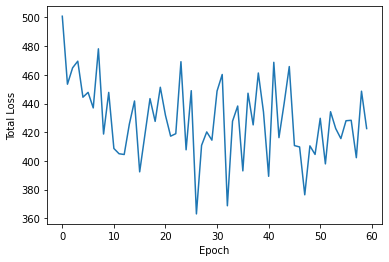

In [129]:
perceptron_algo_plot1(X, y)

##**Observations**



> ***If the learning rate is too small, the algorithm may converge slowly or not at all. If the learning rate is too large, the algorithm may overshoot the optimal solution and converge to a suboptimal solution or diverge as we can see in the above plot when compared to the original plot. So, it is important to select an appropriate learning rate that allows the algorithm to converge to the optimal solution.***

